# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [ ]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [385]:
import pandas as pd
import numpy as np
from sklearn import metrics

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import plotly.express as plx

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



## Loading the dataset

In [386]:
df = pd.read_csv('./Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [387]:
#Observations: look at the data.
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [388]:
#Observations: data types. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All of the Columns were read in as either integers or float point numbers. However, I know that many must in reality be categorical variables. From the variable description, I suggest the following changes:

0. Customer `ID` is an integer, and the integer number indicates the ID, NOT a quantitative metric about the customer. Therefore, Customer ID should be treated like alphabetical strings, `obj64`.
1. `Age` (years) stays `int64`, but could be downcast to `int8` (-128:127) to save RAM. Age cannot be negative.
2. Years professional `Experience` stays `int64`, but could be downcast to `int8` (-128:127). Experience cannot be negative.
3. `Income` in thousands should become `float` point, since it could be divided down to the fraction of a dollar, and there is no memory-saving using `int64` vs `float64`. 
4. `ZIP Code` needs to be changed to a string variable. When using Zip Codes numerically, we should use a geographic representation of the Zip Codes (ex. lat/long of the center of the zip code area). 
5. `Family` (in # of people) stays an `integer`.
6. `CCavg` is 1000's of dollars spent per month on credit cards, and should stay a `float` point. Family cannot be negative.
7. `Education` actually needs to be converted to a `categorical` variable with mapping of "`1: Undergrad; 2: Graduate; 3: Advanced/Professional`". We should keep the `order` of the categories, since we may want to see a comparison in order of ranking. 
8. `Mortgage` should also change to a `float64`, since it is a dollar amount (1000s). Mortgage can be zero, but cannot be negative. NaN values could be zero, and vice-versa.
9. `Personal_Loan` is a binary number indicating 1 for Yes and 0 for No. I will leave it as an `int64`, since that is standard practice for one-hot encoded variables with machine learning algorithms. 
10. `Securities_Account` is a binary number indicating 1 for Yes and 0 for No. I will leave it as an `int64`, since that is standard practice for one-hot encoded variables with machine learning algorithms. 
11. `CD_Account` is a binary number indicating 1 for Yes and 0 for No. I will leave it as an `int64`, since that is standard practice for one-hot encoded variables with machine learning algorithms. 
12. `Online` is a binary number indicating 1 for Yes and 0 for No. I will leave it as an `int64`, since that is standard practice for one-hot encoded variables with machine learning algorithms.
13. `CreditCard` is a binary number indicating 1 for Yes and 0 for No. I will leave it as an `int64`, since that is standard practice for one-hot encoded variables with machine learning algorithms.

In [389]:
df.describe()
df.ID = df["ID"].astype("string")
df.Income = df.Income.astype("float")
df.ZIPCode = df.ZIPCode.astype("string")
df.Mortgage = df.Mortgage.astype("float")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   string 
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   float64
 4   ZIPCode             5000 non-null   string 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   float64
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9), string(2)
memory usage: 547.0 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Univariate Analyses:

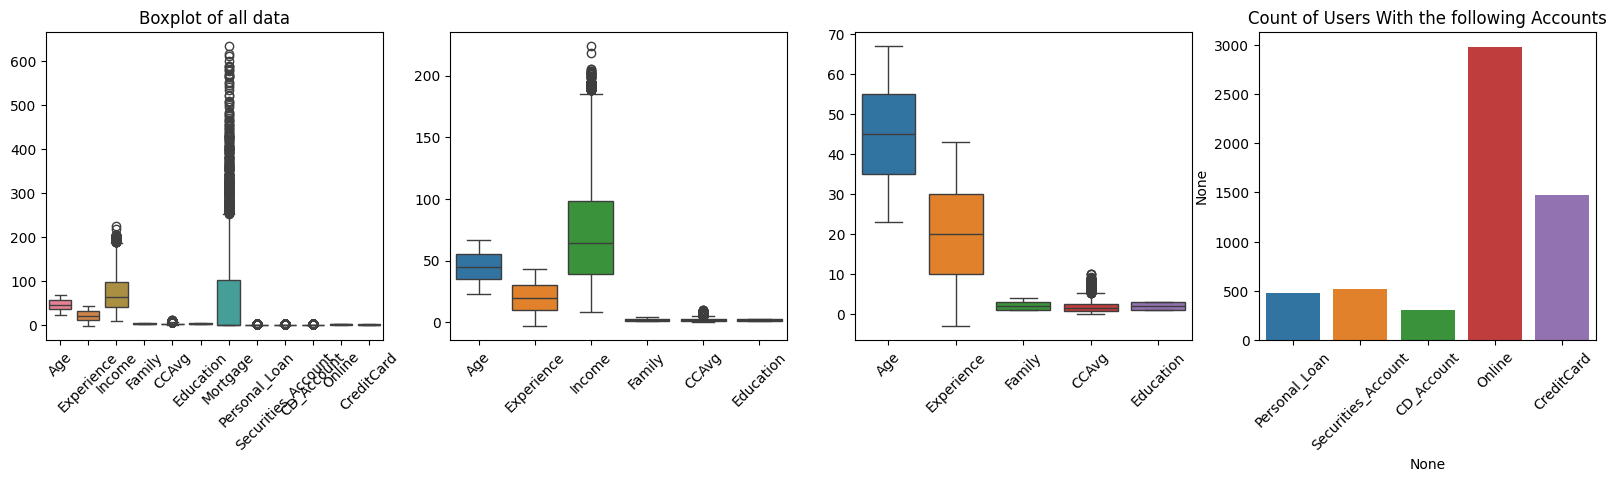

In [390]:
#EDA Distributions: 
fig, (a,b,c,d) = plt.subplots(1,4,width_ratios=[1,1,1,1],figsize=(20,4))

sns.boxplot(df, ax=a).set(title="Boxplot of all data")
a.tick_params(axis='x', rotation=45)

sns.boxplot(df[["Age","Experience","Income","Family","CCAvg","Education"]], ax=b)
b.tick_params(axis='x', rotation=45)

sns.boxplot(df[["Age","Experience","Family","CCAvg","Education"]], ax=c)
c.tick_params(axis='x', rotation=45)

# Let's analyze the one-hot items: 
df_sums = df[["Personal_Loan","Securities_Account","CD_Account","Online","CreditCard"]].sum()

sns.barplot(x=df_sums.index,y=df_sums,  dodge=False, ax=d, hue=df_sums.index).set(title="Count of Users With the following Accounts")
d.tick_params(axis='x', rotation=45)

plt.show()

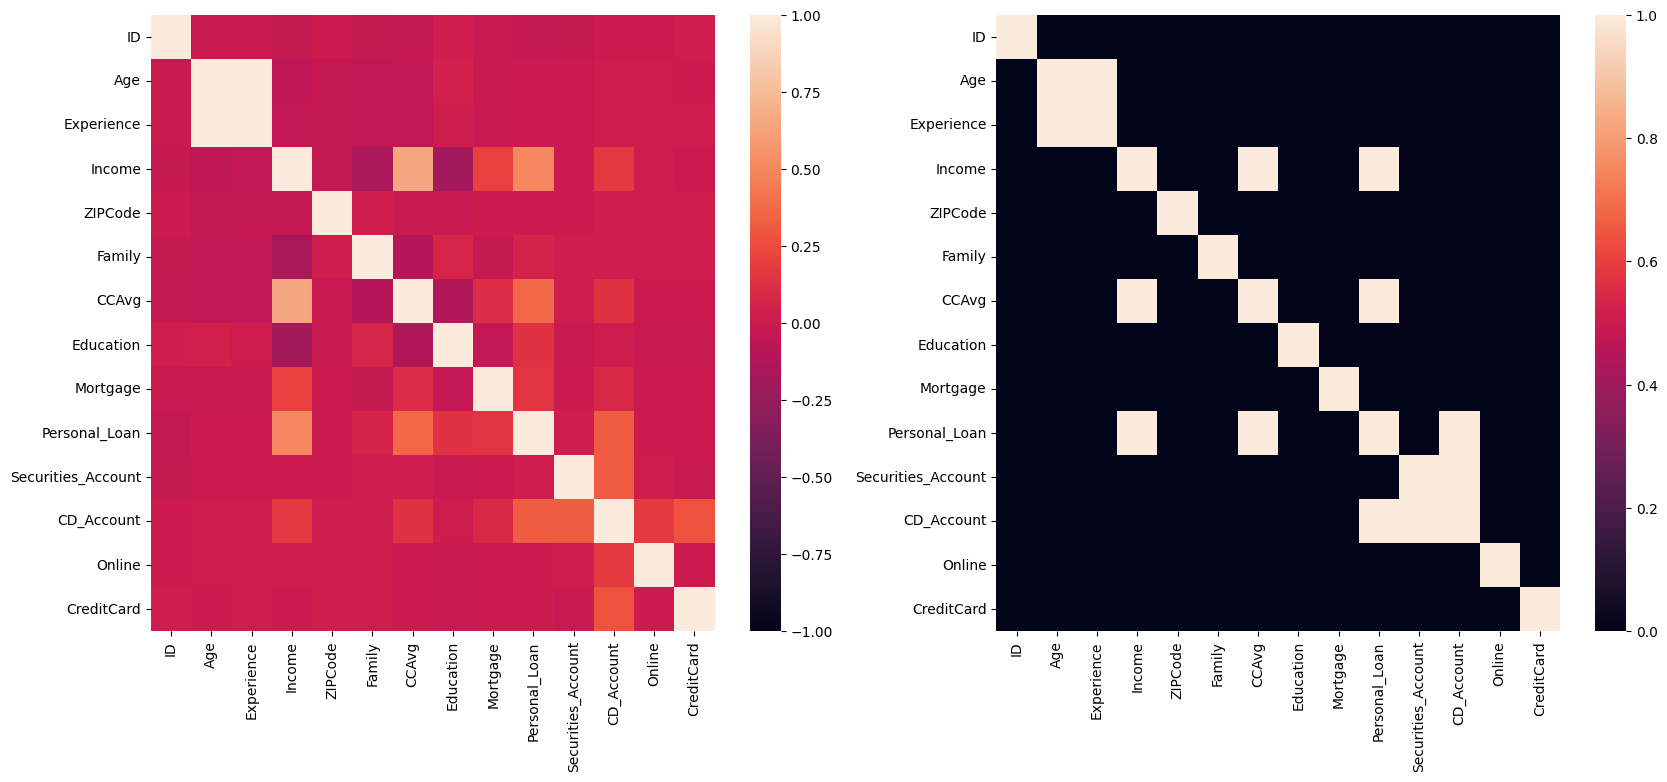

In [391]:
fig,(a,b) = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(df.corr(),vmin=-1,ax=a)

sns.heatmap(abs(df.corr())>0.3,ax=b)
plt.show()

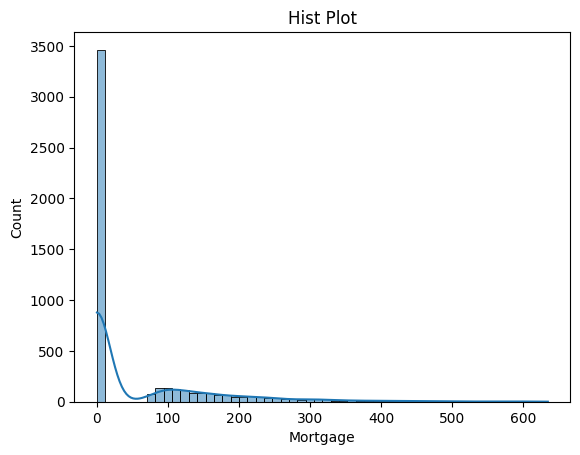

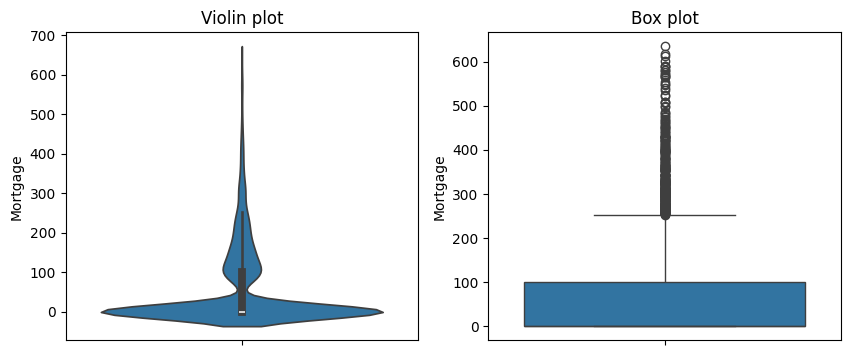

In [392]:
# Question 1: Mortgage Distribution.


sns.histplot(df["Mortgage"],kde=True).set(title="Hist Plot")
plt.show()

fig1,(b,c) = plt.subplots(1,2,figsize=(10,4))

sns.violinplot(df.Mortgage,ax=b).set(title="Violin plot")
sns.boxplot(df.Mortgage,ax=c).set(title="Box plot")
plt.show()

Now I will check for inappropriate values, ex. negative Family Member numbers. 

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [393]:
df.Experience = df.Experience.where(df.Experience >= 0, other=np.nan)


In [394]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,4948.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.331043,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.311973,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Minimum experience is -3, so there must be errors. Let's take a look at values where Experience is <0.

It does seem weird that the minimum amount of Education is 1 (Undergraduate), since not everyone who uses our bank has attended university. We should consider renaming that category "Undergrad or lower."  We will ignore this for now. 

In [395]:
df[df.Experience == np.nan].describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Should we drop these values? 
Q: Do the values represent something valid?

A: No (Not that we know of). 


Q: Is there a good way to tell what the values should have been? 

A: No - we're not sure how the data was entered, and whether or not the data collection technique would have made it easy to accidentally put in a negative number. Perhaps some users entered this number intentionally, and it means something to them. Perhaps the data was corrupted. Perhaps the 'experience' number was too high for the form, ex. 50 years, and the item wrapped around again (unlikely since the Ages are all between 23 and 29). Perhaps these users left experience blank, and the data parsing algorithm accidentally pulled in a hyphen and number from a neighboring data column that was dropped from this data set. 


Q: Can we safely drop these without skewing the data?

A: 52/5000 is ~1% of the data, which isn't a significant amount and should be droppable. Even if these customers have particularly high Mortgage, CCavg, etc., they won't be able to skew the means much. I can do a more thorough outlier test later to double-check. 

### Yes, we should drop these values. 

In [396]:
df_clean = df[df.Experience >= 0]
df_clean.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

### Model Evaluation Criterion

* Will someone take out a Personal Loan? Y/N.

Is False Positive or False Negative worse?

* False Positive: AllLife spends marketing money on people who would not take out loans.
* False Negative: AllLife does not spend marketing money on people who **would** take out loans. 

**False Negative is worse**, because we lose out on Loan customers. (Depending on the cost of our marketing campaign. Assume Cost << Benefit of one customer.)

In [397]:
# Split our data into x and y, where the y is whether that person took out a Personal Loan. 

x = df_clean.drop("Personal_Loan",axis=1)

y = df_clean.pop("Personal_Loan")

print(x.head())
print(y.head())

  ID  Age  Experience  Income ZIPCode  Family  CCAvg  Education  Mortgage  \
0  1   25         1.0    49.0   91107       4    1.6          1       0.0   
1  2   45        19.0    34.0   90089       3    1.5          1       0.0   
2  3   39        15.0    11.0   94720       1    1.0          1       0.0   
3  4   35         9.0   100.0   94112       1    2.7          2       0.0   
4  5   35         8.0    45.0   91330       4    1.0          2       0.0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64


### Model Building

In [398]:
# Generate training and testing values.

# train_test_split just helps us split arrays into random subsets that can be used for training and testing, respectively.
# Test_size is 30% of the dataset. train_size defaults to the complement of test_size. random_state can be reproduced in future tests with the same integer, random_state=1.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 
feature_names=list(x.columns)

DecisionTreeClassifier(random_state=1) 


Training score: 1.0
Test data score: 0.9824915824915825
Tree levels: 11


Text Tree: |--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CCAvg <= 1.95
|   |   |   |   |--- CCAvg <= 1.85
|   |   |   |   |   |--- ID <= 2545.00
|   |   |   |   |   |   |--- Experience <= 7.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Experience >  7.50
|   |   |   |   |   |   |   |--- ZIPCode <= 92901.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ZIPCode >  92901.50
|   |   |   |   |   |   |   |   |--- ID <= 1363.50
|   |   |   |   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 1.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  1.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Income >  111.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   

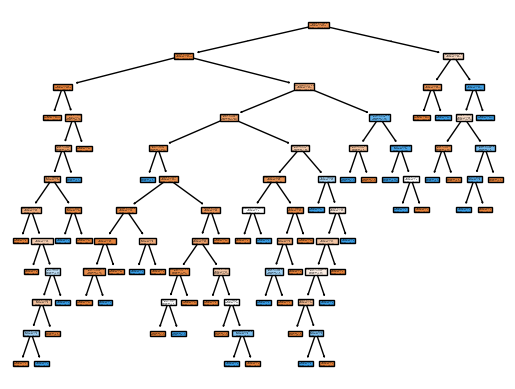

In [399]:

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1);
print(dTree.fit(x_train, y_train),"\n\n")
print("Training score:", dTree.score(x_train,y_train))
print("Test data score:", dTree.score(x_test,y_test))
dTree.get_depth()
dTree.get_params()


tree.plot_tree(dTree, filled=True, feature_names=feature_names);
print("Tree levels:",dTree.get_depth())
plt.savefig('tree_high_dpi', dpi=500);
# plt.show()
print("Text Tree:",tree.export_text(dTree,feature_names=feature_names))

Click to enlarge
[![](tree_high_dpi.png)](tree_high_dpi.png)

### Model Performance Improvement

DecisionTreeClassifier(max_depth=4, random_state=1) 


Training score: 0.9858504187120993
Test data score: 0.9797979797979798
Tree levels: 4


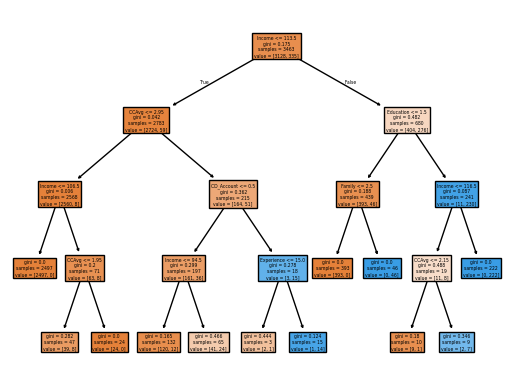

Text Tree: |--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CCAvg <= 1.95
|   |   |   |   |--- class: 0
|   |   |   |--- CCAvg >  1.95
|   |   |   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- class: 0
|   |   |   |--- Income >  94.50
|   |   |   |   |--- class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- Experience <= 15.00
|   |   |   |   |--- class: 0
|   |   |   |--- Experience >  15.00
|   |   |   |   |--- class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.15
|   |   |   |   |--- class: 0
|   |   |   |--- CCAvg >  2.15
|   |   |   |   |--- class: 1
|   |   |--- Income >  116.50
|   |   |   |--- class:

In [400]:

dTree_pruned = DecisionTreeClassifier(criterion = 'gini', random_state=1,max_depth=4)
print(dTree_pruned.fit(x_train, y_train),"\n\n")
print("Training score:", dTree_pruned.score(x_train,y_train))
print("Test data score:", dTree_pruned.score(x_test,y_test))
dTree_pruned.get_depth()
dTree_pruned.get_params()


tree.plot_tree(dTree_pruned, filled=True, feature_names=feature_names)
print("Tree levels:",dTree_pruned.get_depth())
plt.savefig('tree_4lvls_high_dpi', dpi=300)
plt.show()
print("Text Tree:",tree.export_text(dTree_pruned, feature_names=feature_names))

Click to enlarge
[![](tree_4lvls_high_dpi.png)](tree_4lvls_high_dpi.png)

## Model Comparison and Final Model Selection

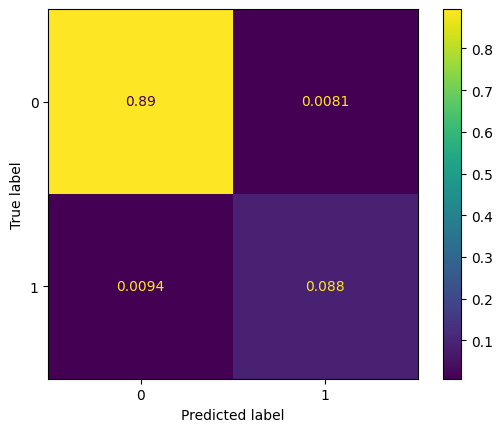

In [401]:

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import recall_score, precision_score, ConfusionMatrixDisplay
y1_pred = dTree.predict(x_test)
tree_cm=cm(y_test,y1_pred)

ConfusionMatrixDisplay.from_predictions(y_test,y1_pred,normalize="all")
plt.show()


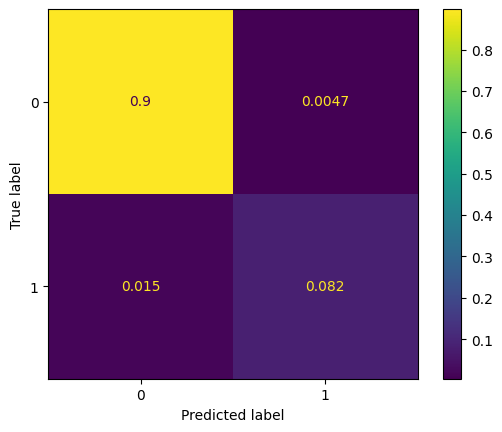

In [402]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import recall_score, precision_score, ConfusionMatrixDisplay
ypruned_pred = dTree_pruned.predict(x_test)
tree_4lvls_cm = cm(y_test,ypruned_pred)

ConfusionMatrixDisplay.from_predictions(y_test,ypruned_pred,normalize="all")
plt.show()

#### Classification Error Rate:
False Positives + False Negatives / All Outcomes.

In [414]:
metrics.classification_report(y_test,y1_pred,output_dict=True)
metrics.classification_report(y_test,ypruned_pred,output_dict=True)


{'0': {'precision': 0.9830383480825958,
  'recall': 0.994776119402985,
  'f1-score': 0.9888724035608308,
  'support': 1340.0},
 '1': {'precision': 0.9457364341085271,
  'recall': 0.8413793103448276,
  'f1-score': 0.8905109489051095,
  'support': 145.0},
 'accuracy': 0.9797979797979798,
 'macro avg': {'precision': 0.9643873910955615,
  'recall': 0.9180777148739063,
  'f1-score': 0.9396916762329701,
  'support': 1485.0},
 'weighted avg': {'precision': 0.9793960736541514,
  'recall': 0.9797979797979798,
  'f1-score': 0.9792680864395651,
  'support': 1485.0}}

#### Sensitivity (Recall / True Positive Rate):


In [410]:

print("Sensitivity for Decision Tree with Unlimited Depth:",recall_score(y_test,y1_pred))
print("Sensitivity for Pruned Decision Tree (Depth = 4):",recall_score(y_test,ypruned_pred))


Sensitivity for Decision Tree with Unlimited Depth: 0.903448275862069
Sensitivity for Pruned Decision Tree (Depth = 4): 0.8413793103448276


#### Specificity (True Negative Rate):


#### ROC Curves

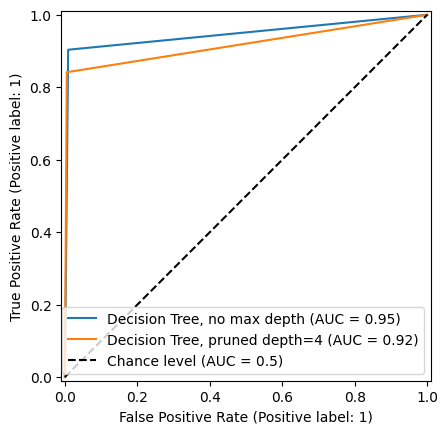

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,ax = plt.subplots()

plot1 = RocCurveDisplay.from_predictions(y_test,y1_pred,plot_chance_level=False,ax=ax,name="Decision Tree, no max depth")
plot2 = RocCurveDisplay.from_predictions(y_test,ypruned_pred,plot_chance_level=True,ax=ax, name="Decision Tree, pruned depth=4")

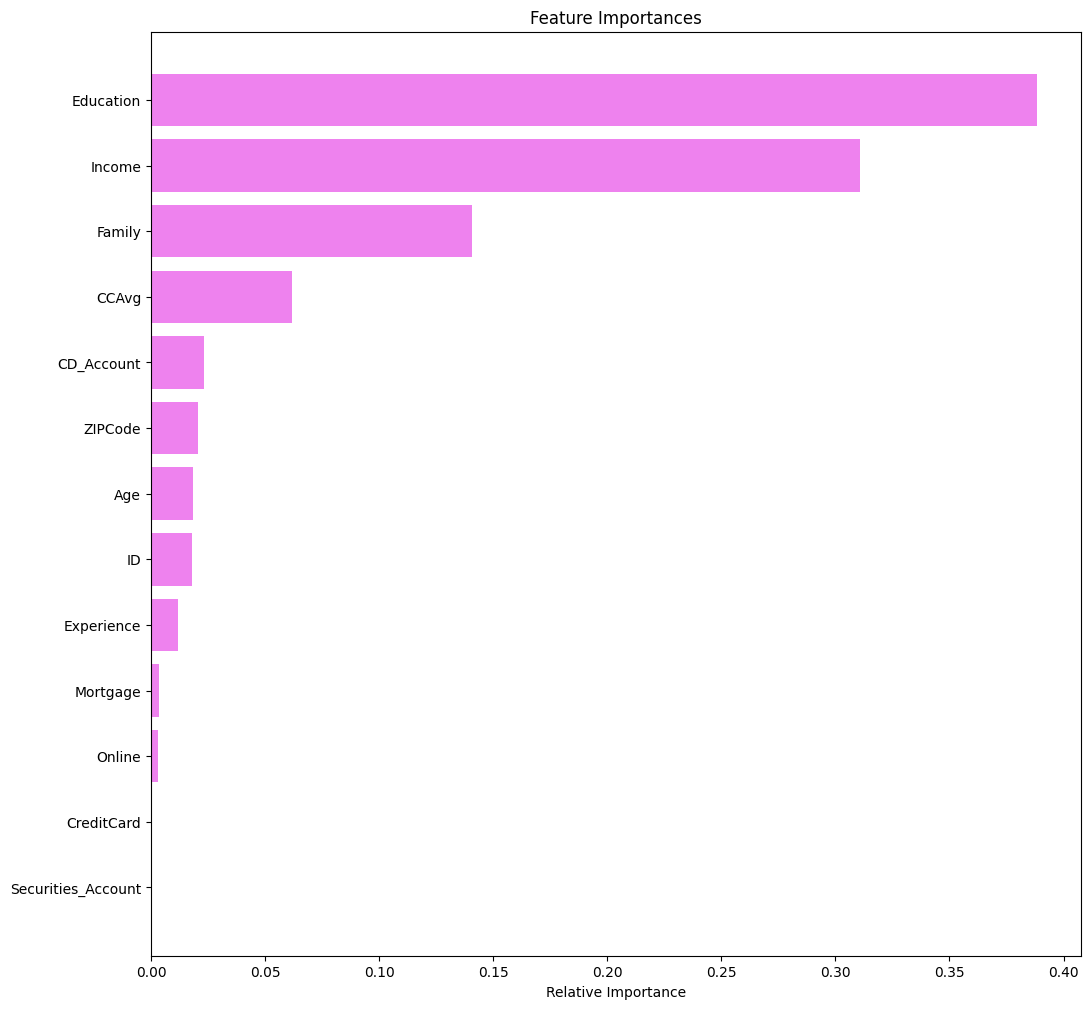

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

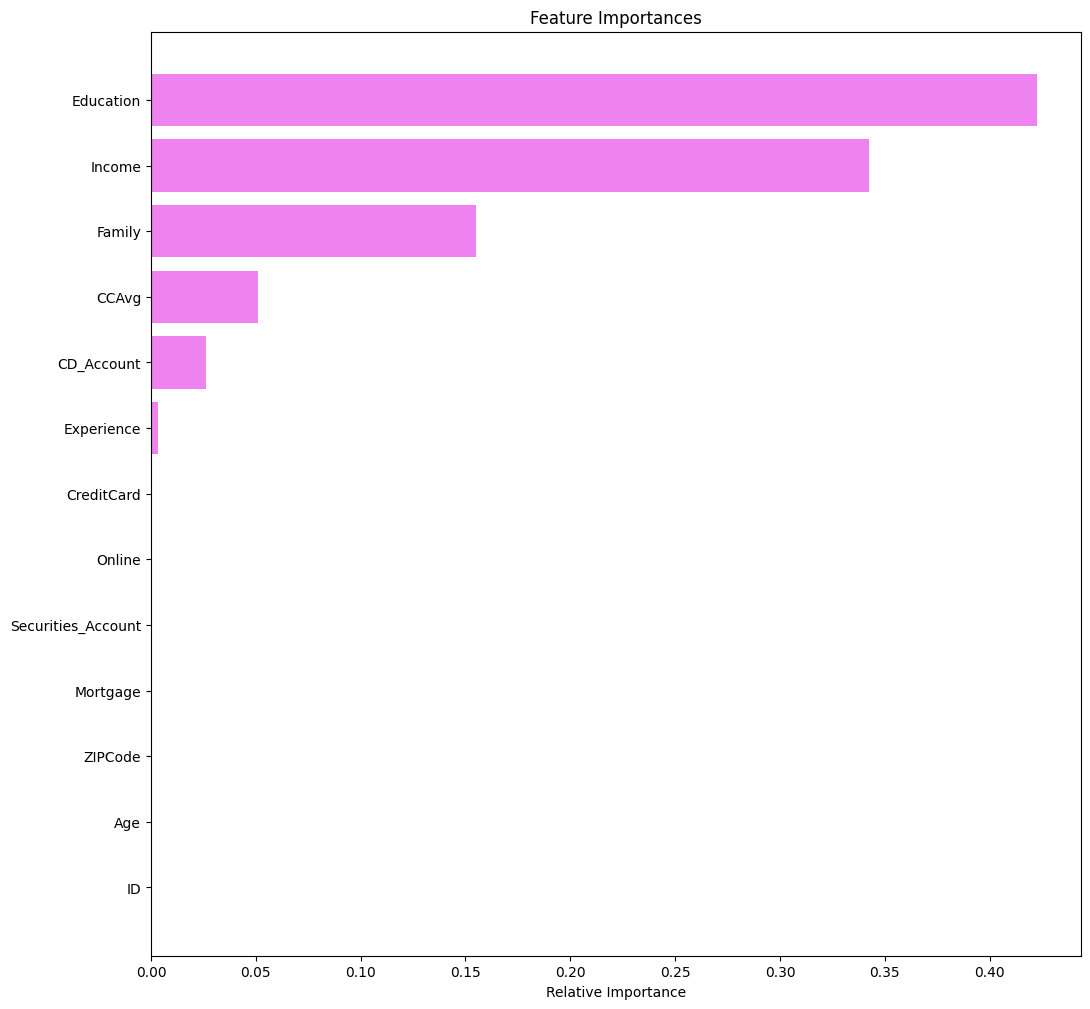

In [ ]:
importances2 = dTree_pruned.feature_importances_
indices = np.argsort(importances2)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances2[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on the most preferential nodes of the Decision Tree, AllLife Marketing Group should focus on customers with an education **Higher** than undergraduate (>= 2), and **Income > $116,500/yr.** 

___